# Telecom Churn Prediction

**Author:** Abhishek Mulay

# 0. Problem statement

Telecom companies across the world are facing a need to constantly evolve due to the changing customer needs and competition in the market. Telecom companies not just need to keep their plans and services competitive but also need to customize their offerings based on the patterns and needs of customer segments. 
Adopting a correct strategy is key not only towards increasing the customer base but also to retain the current customers and preventing churn. Based on surveys, post pandemic the customer loyalty to Telecom providers has gone down by 22% - taking the average churn rate for telecom companies in the range of 22-35% with customer stickiness being impacted more by the customer experience than ever. 
Moreover customers are becoming increasingly price sensitive and a good majority perceive Telco offerings as expensive. As per studies, it costs companies 5x more to acquire a new customer as compared to retaining current customer. Moreover, it is critical to retain high value customers like corporate customers, small and medium enterprises, family plan customers and such other categories.

Therefore its is a key part of the Telco strategy to identify the underlying patterns that impact churn and then take necessary actions for customer retention - the policies applied for retention may be different as per the customer category - such as network service improvement, better internet speed, bundled plans - such as mobile + broadband + content bundling or family bundles etc. Thus churn prediction plays an important role in driving marketing strategy decisions for a Telecom company.

As part of this analysis a the data set used is from a major Telecom company in South East Asia and the objective is to analyse the data and prepare a model that can predit the churn probability with maximum accuracy.

In this competition, the goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first month is the ‘good’ phase, the second & third month is the ‘action’ phase.

# 1. Loading dependencies, datasets & initial understanding of dataset



## 1.1 Loading dependencies & datasets.

In [174]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Class imbalance handling
from imblearn.over_sampling import SMOTE

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report

from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, log_loss

import xgboost as xgb

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [2]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

#data = pd.read_csv("/kaggle/input/kagglelabstest2021/train.csv")
#unseen = pd.read_csv("/kaggle/input/kagglelabstest2021/test.csv")
#sample = pd.read_csv("/kaggle/input/kagglelabstest2021/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/kagglelabstest2021/data_dictionary.csv")

#print(data.shape)
#print(unseen.shape)
#print(sample.shape)
#print(data_dict.shape)

In [4]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [5]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [6]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
len(data)

69999

## 1.2. Initial understanding of the dataset

In [8]:
for col in data.columns:
    print ("Missing data % for column {} is {}".format(col,100*data[col].isnull().sum()/len(data)))

Missing data % for column id is 0.0
Missing data % for column circle_id is 0.0
Missing data % for column loc_og_t2o_mou is 1.0028714695924228
Missing data % for column std_og_t2o_mou is 1.0028714695924228
Missing data % for column loc_ic_t2o_mou is 1.0028714695924228
Missing data % for column last_date_of_month_6 is 0.0
Missing data % for column last_date_of_month_7 is 0.570008142973471
Missing data % for column last_date_of_month_8 is 1.0471578165402362
Missing data % for column arpu_6 is 0.0
Missing data % for column arpu_7 is 0.0
Missing data % for column arpu_8 is 0.0
Missing data % for column onnet_mou_6 is 3.954342204888641
Missing data % for column onnet_mou_7 is 3.8386262660895154
Missing data % for column onnet_mou_8 is 5.2900755725081785
Missing data % for column offnet_mou_6 is 3.954342204888641
Missing data % for column offnet_mou_7 is 3.8386262660895154
Missing data % for column offnet_mou_8 is 5.2900755725081785
Missing data % for column roam_ic_mou_6 is 3.954342204888641

Lets check the distribution of the data for select columns that do not have null values

In [9]:
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(data.columns) if re.search('total.+ic.+mou',i)]
cols_dist_check = [*total_amounts,
                   *total_outgoing_minutes,
                   *total_incoming_minutes,
                   'arpu_6',
                   'arpu_7',
                   'arpu_8']

In [10]:
data[cols_dist_check].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355,306.451436,310.572674,304.513065,199.710640,201.878029,198.486034,283.134365,278.185912,278.858826
std,404.211068,411.070120,426.181405,465.502866,479.131770,477.936832,290.114823,296.771338,288.336731,334.213918,344.366927,351.924315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2258.709000,-1289.715000,-945.808000
25%,110.000000,100.000000,90.000000,44.780000,42.910000,38.710000,38.640000,41.340000,38.290000,93.581000,86.714000,84.095000
50%,229.000000,220.000000,225.000000,145.280000,141.230000,138.360000,114.780000,116.330000,114.610000,197.484000,191.588000,192.234000
75%,438.000000,430.000000,436.000000,374.305000,380.045000,370.895000,251.070000,249.470000,249.710000,370.791000,365.369500,369.909000
max,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,7716.140000,9699.010000,10830.380000,27731.088000,35145.834000,33543.624000


In [11]:
monthly_cols = [i for i in list(data.columns) if re.search('monthly',i)]
sachet_cols = [i for i in list(data.columns) if re.search('sachet',i)]
cols_dist_check2 = [*monthly_cols,
                    *sachet_cols]

In [12]:
data[cols_dist_check2].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.079287,0.083401,0.080930,0.075815,0.077730,0.081958,0.388863,0.441406,0.449492,0.075344,0.081444,0.085487
std,0.294719,0.304802,0.299254,0.358905,0.383189,0.381821,1.494206,1.651012,1.632450,0.573003,0.634547,0.680035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,9.000000,16.000000,16.000000,42.000000,48.000000,44.000000,29.000000,33.000000,41.000000


In [13]:
for col in cols_dist_check2:
    print(data[data['churn_probability'] == 1][col].value_counts())
    print(data[data['churn_probability'] == 0][col].value_counts())

monthly_2g_6
0    6839
1     272
2      18
4       2
3       1
Name: count, dtype: int64
monthly_2g_6
0    58057
1     4416
2      371
3       19
4        4
Name: count, dtype: int64
monthly_2g_7
0    6926
1     195
2      11
Name: count, dtype: int64
monthly_2g_7
0    57769
1     4611
2      456
3       27
4        3
5        1
Name: count, dtype: int64
monthly_2g_8
0    7043
1      84
2       5
Name: count, dtype: int64
monthly_2g_8
0    57774
1     4654
2      408
3       24
4        6
5        1
Name: count, dtype: int64
monthly_3g_6
0    6750
1     312
2      52
3      11
5       3
4       3
6       1
Name: count, dtype: int64
monthly_3g_6
0    59240
1     2838
2      543
3      156
4       56
5       13
6        9
7        8
8        2
9        2
Name: count, dtype: int64
monthly_3g_7
0    6844
1     233
2      46
3       8
5       1
Name: count, dtype: int64
monthly_3g_7
0     59218
1      2721
2       665
3       155
4        48
5        26
6        18
7         6
8         4
9

For the monthly* and sachet* columns, the data is much skewed towards zero. And this is the same for both classes. Therefore these columns will not add to much variation in the data

In [14]:
t2c_cols = ['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']
for col in t2c_cols:
    avg_C1 = data[data['churn_probability'] == 1][col].sum()/len(data[data['churn_probability'] == 1])
    avg_C0 = data[data['churn_probability'] == 0][col].sum()/len(data[data['churn_probability'] == 0])
    print("for column {} average for class 0 is {} and average for class 1 is {}".format(col, avg_C0, avg_C1))

for column loc_og_t2c_mou_6 average for class 0 is 1.0825506227432518 and average for class 1 is 1.0722251822770612
for column loc_og_t2c_mou_7 average for class 0 is 1.306653888367506 and average for class 1 is 1.327781828379136
for column loc_og_t2c_mou_8 average for class 0 is 1.4326917142539013 and average for class 1 is 0.5786553561413348


We dont see a significant variation in the number calls made to the call center acriss the two classes

In [15]:
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
recharge_date = [i for i in list(data.columns) if re.search('date.+last.+rech',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *recharge_date,
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

data = data[variables].set_index('id')

In [16]:
data.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,81.21,221.68,3.63,6/22/2014,7/10/2014,8/24/2014,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,109,0,145,50,0.00,30.73,31.66,6/12/2014,7/10/2014,8/26/2014,...,122.08,NaN,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,109,70,120,0,56.49,99.36,0.00,6/11/2014,7/22/2014,8/24/2014,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,109,160,240,130,76.03,95.98,53.84,6/15/2014,7/21/2014,8/25/2014,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,109,290,136,122,63.26,42.94,15.76,6/25/2014,7/26/2014,8/30/2014,...,35.12,0.0,0.0,0.00,0.0,390.8,308.89,213.47,647,0


Let's look at each variable's datatype:

In [17]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   circle_id                 69999 non-null  int64  
 1   total_rech_amt_6          69999 non-null  int64  
 2   total_rech_amt_7          69999 non-null  int64  
 3   total_rech_amt_8          69999 non-null  int64  
 4   total_og_mou_6            69999 non-null  float64
 5   total_og_mou_7            69999 non-null  float64
 6   total_og_mou_8            69999 non-null  float64
 7   date_of_last_rech_6       68898 non-null  object 
 8   date_of_last_rech_7       68765 non-null  object 
 9   date_of_last_rech_8       67538 non-null  object 
 10  date_of_last_rech_data_6  17568 non-null  object 
 11  date_of_last_rech_data_7  17865 non-null  object 
 12  date_of_last_rech_data_8  18417 non-null  object 
 13  offnet_mou_6              67231 non-null  float64
 14  offnet_mou_

Let's also summarize the features using the df.describe method:

In [18]:
data.describe(include="all")

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,...,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11880,12206,10324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,109.0,328.139788,322.376363,323.846355,306.451436,310.572674,304.513065,NaN,NaN,NaN,...,85.846074,86.348404,122.171882,128.934444,135.486541,51.773924,51.240204,50.127506,1220.639709,0.101887
std,0.0,404.211068,411.070120,426.181405,465.502866,479.131770,477.936832,NaN,NaN,NaN,...,178.067280,170.297094,554.869965,554.096072,568.310234,212.513909,211.114667,213.101403,952.426321,0.302502
min,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,109.0,110.000000,100.000000,90.000000,44.780000,42.910000,38.710000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000
50%,109.0,229.000000,220.000000,225.000000,145.280000,141.230000,138.360000,NaN,NaN,NaN,...,8.800000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000
75%,109.0,438.000000,430.000000,436.000000,374.305000,380.045000,370.895000,NaN,NaN,NaN,...,122.070000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000


# 2. Create X, y and then Train test split

Lets create X and y datasets and skip "circle_id" since it has only 1 unique value

In [19]:
data['circle_id'].unique()

array([109], dtype=int64)

In [20]:
X = data.drop(['circle_id'],axis=1).iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 28), (69999,))

Splitting train and test data to avoid any contamination of the test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 28), (14000, 28), (55999,), (14000,))

In [22]:
X_train.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,,,,,,
844,120,220,222,236.03,126.43,95.09,6/21/2014,7/22/2014,8/25/2014,NaN,...,NaN,NaN,40.71,0.00,0.00,323.58,0.00,0.00,54.11,3651
33065,270,0,0,167.49,0.00,0.00,6/17/2014,7/30/2014,8/28/2014,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,981
53808,120,30,10,42.76,15.06,32.91,6/20/2014,7/22/2014,8/24/2014,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1654
3988,0,60,20,0.00,91.38,13.18,6/27/2014,7/21/2014,8/30/2014,NaN,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,492
63258,47,61,62,56.39,345.98,533.69,6/28/2014,7/20/2014,8/28/2014,6/17/2014,...,19.55,35.0,NaN,1230.43,152.09,0.00,10.74,0.04,0.00,493


# 3. Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

<Axes: >

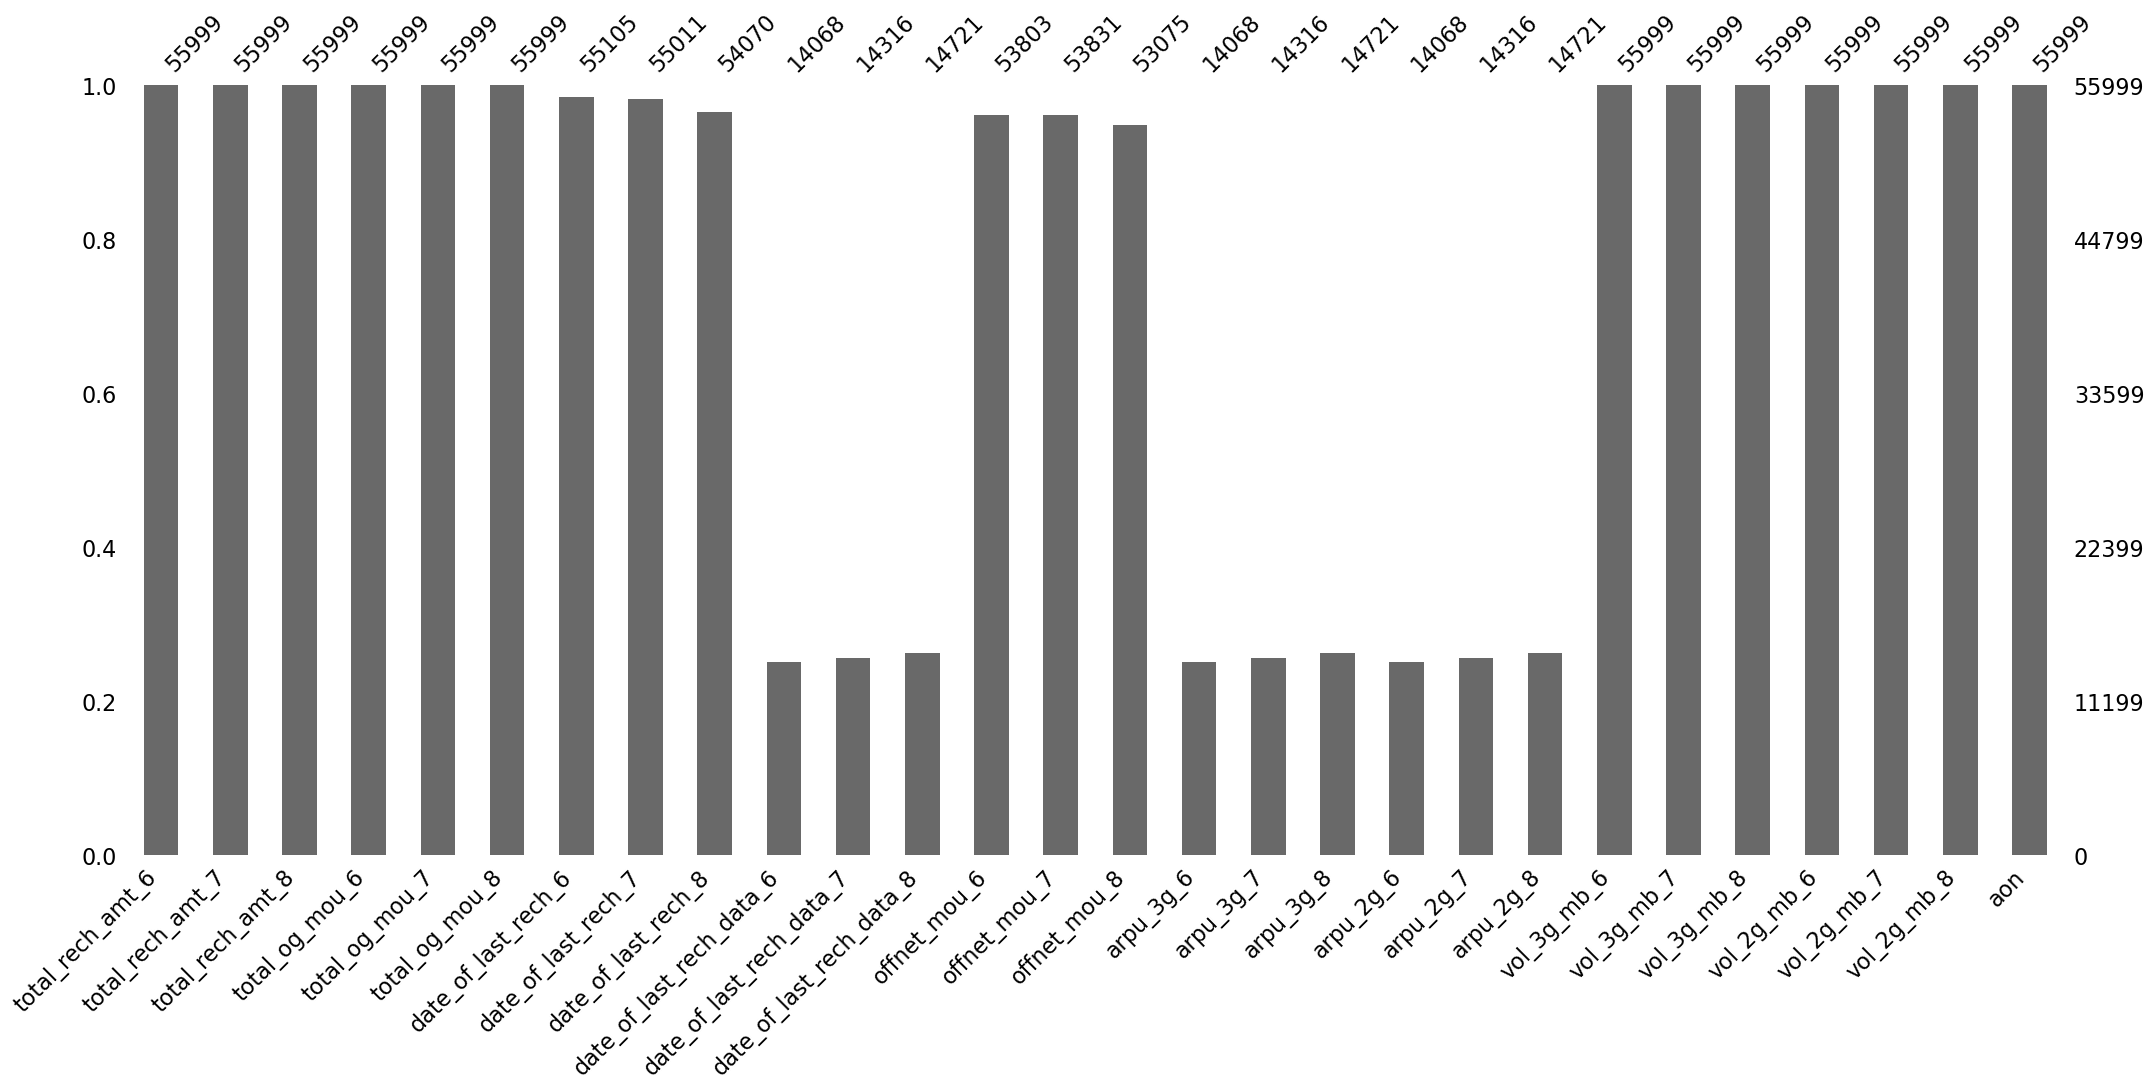

In [23]:
msno.bar(X_train)

<Axes: >

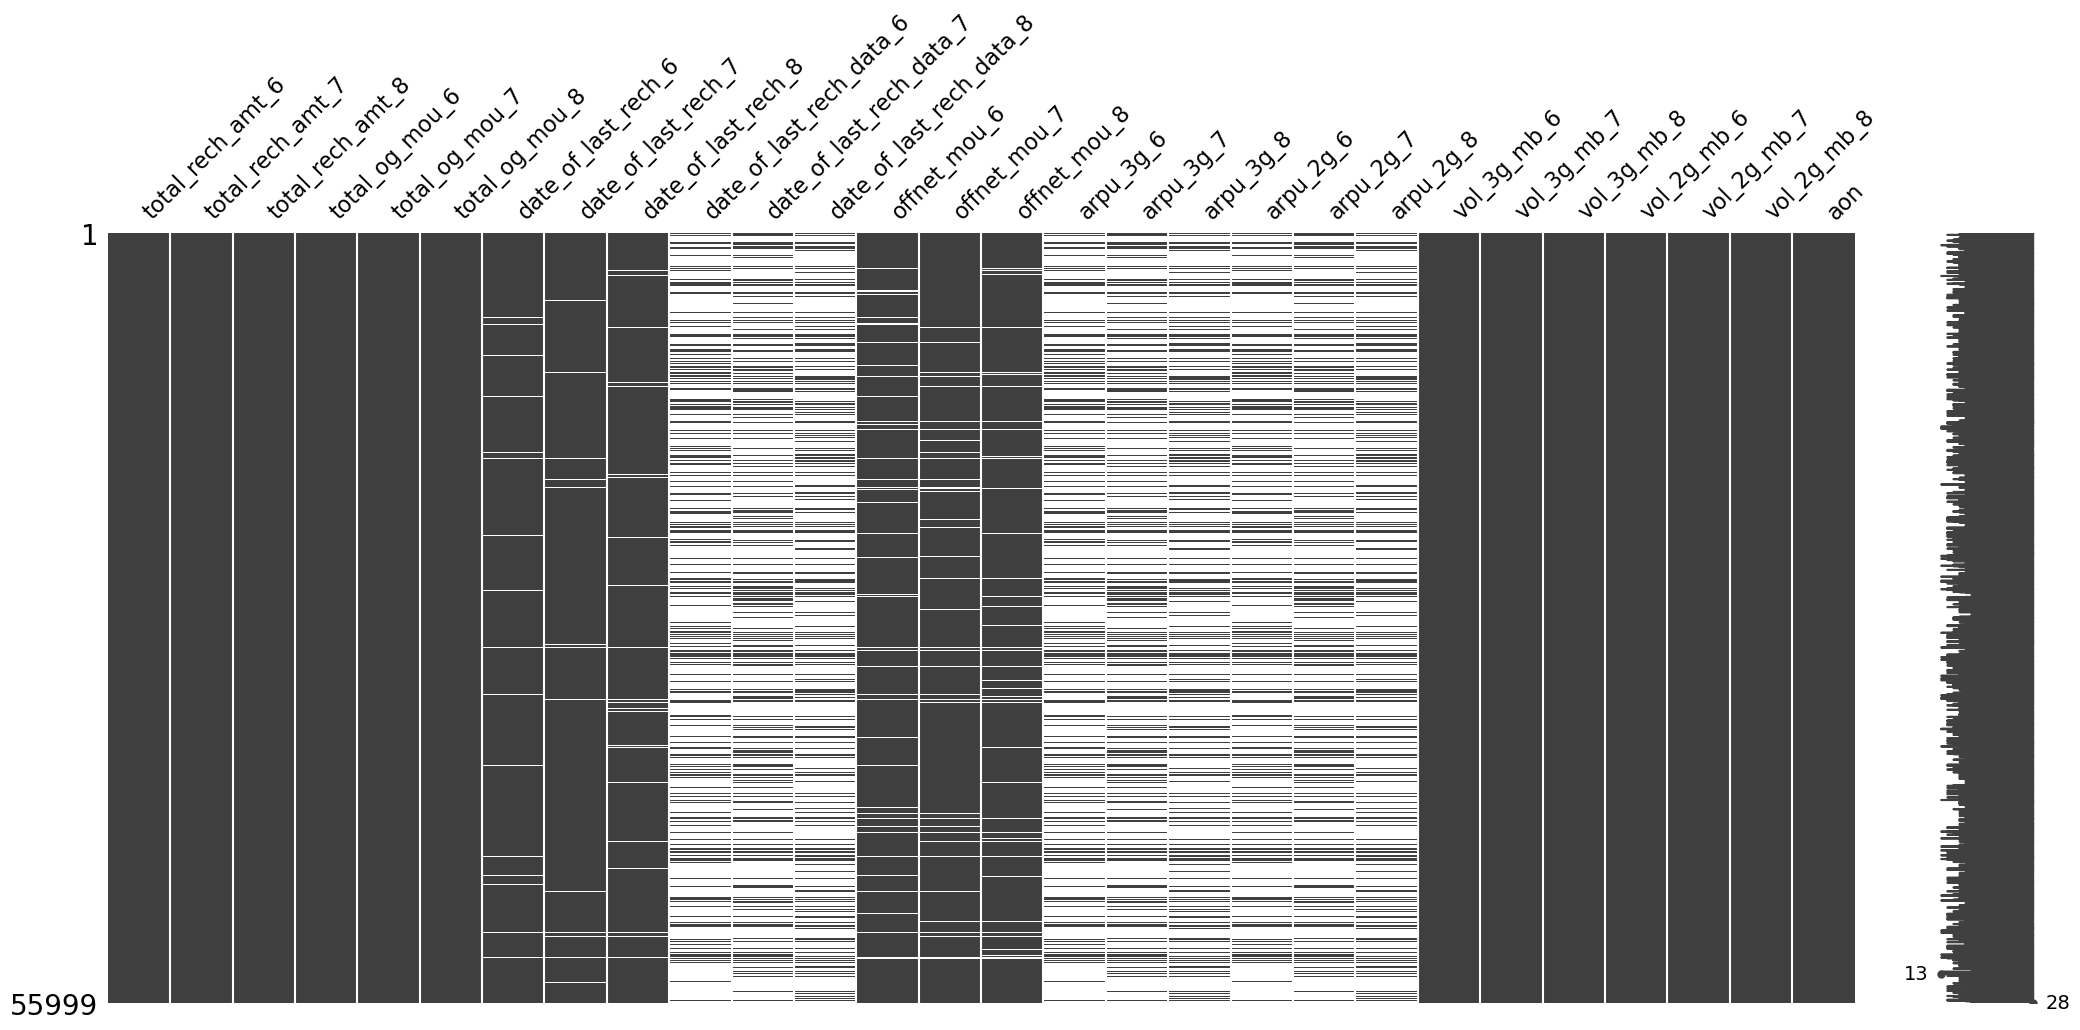

In [24]:
msno.matrix(X_train)

Lets also calculate the % missing data for each column:

In [25]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_og_mou_6               0.000000
total_og_mou_7               0.000000
total_og_mou_8               0.000000
date_of_last_rech_6          1.596457
date_of_last_rech_7          1.764317
date_of_last_rech_8          3.444704
date_of_last_rech_data_6    74.878123
date_of_last_rech_data_7    74.435258
date_of_last_rech_data_8    73.712031
offnet_mou_6                 3.921499
offnet_mou_7                 3.871498
offnet_mou_8                 5.221522
arpu_3g_6                   74.878123
arpu_3g_7                   74.435258
arpu_3g_8                   73.712031
arpu_2g_6                   74.878123
arpu_2g_7                   74.435258
arpu_2g_8                   73.712031
vol_3g_mb_6                  0.000000
vol_3g_mb_7                  0.000000
vol_3g_mb_8                  0.000000
vol_2g_mb_6                  0.000000
vol_2g_mb_7                  0.000000
vol_2g_mb_8 

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [26]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'aon'],
      dtype='object')

In [27]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 19)

## Data imputation

In [28]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

In [29]:
#We need a differnt strategy for the date columns and for the numeric columns
numeric_impute_cols = impute_cols[3:6]

In [30]:
numeric_impute_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [31]:
imp = SimpleImputer(strategy='constant', fill_value=0)
#imputer = KNNImputer(n_neighbors= 2)
X_train_filtered[numeric_impute_cols] = imp.fit_transform(X_train_filtered[numeric_impute_cols])

In [32]:
#For the date columns , lets derive a new feature by applying some logic and then delete those date columns
def derive_days_since_recharge(input_df):
    #Days Since Last Recharge
    input_df['date_of_last_rech_6'] = input_df['date_of_last_rech_6'].fillna('5/1/2014')
    input_df['date_of_last_rech_7'] = input_df['date_of_last_rech_7'].fillna('5/1/2014')
    input_df['date_of_last_rech_8'] = input_df['date_of_last_rech_8'].fillna('5/1/2014')
    input_df['date_of_last_rech_6'] = pd.to_datetime(input_df['date_of_last_rech_6'], format="%m/%d/%Y")
    input_df['date_of_last_rech_7'] = pd.to_datetime(input_df['date_of_last_rech_7'], format="%m/%d/%Y")
    input_df['date_of_last_rech_8'] = pd.to_datetime(input_df['date_of_last_rech_8'], format="%m/%d/%Y")
    input_df['max_rech_date'] = input_df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].max(axis=1)
    #Get the days difference between the 31-Aug-2014 (last date in the month 8) and the overall date of last recharge
    input_df['days_since_last_rech'] = (pd.to_datetime('2014-08-31') - input_df['max_rech_date']).dt.days
    input_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','max_rech_date'],axis=1,inplace=True)


In [33]:
derive_days_since_recharge(X_train_filtered)


In [34]:
X_train_filtered.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,days_since_last_rech
id,,,,,,,,,,,,,,,,,
844,120,220,222,236.03,126.43,95.09,180.54,83.73,72.23,0.00,0.00,323.58,0.00,0.00,54.11,3651,6
33065,270,0,0,167.49,0.00,0.00,166.39,0.00,0.76,0.00,0.00,0.00,0.00,0.00,0.00,981,3
53808,120,30,10,42.76,15.06,32.91,63.14,12.70,0.70,0.00,0.00,0.00,0.00,0.00,0.00,1654,7
3988,0,60,20,0.00,91.38,13.18,0.00,86.68,6.55,0.00,0.00,0.00,0.00,0.00,0.00,492,1
63258,47,61,62,56.39,345.98,533.69,0.63,4.76,5.01,1230.43,152.09,0.00,10.74,0.04,0.00,493,3


In [35]:
X_new_vars = new_vars.to_list()

In [36]:
X_new_vars.remove('date_of_last_rech_6')
X_new_vars.remove('date_of_last_rech_7')
X_new_vars.remove('date_of_last_rech_8')
X_new_vars.append('days_since_last_rech')

In [37]:
missing_data_percent = 100*X_train_filtered.isnull().sum()/len(X_train_filtered)
missing_data_percent

total_rech_amt_6        0.0
total_rech_amt_7        0.0
total_rech_amt_8        0.0
total_og_mou_6          0.0
total_og_mou_7          0.0
total_og_mou_8          0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
vol_3g_mb_6             0.0
vol_3g_mb_7             0.0
vol_3g_mb_8             0.0
vol_2g_mb_6             0.0
vol_2g_mb_7             0.0
vol_2g_mb_8             0.0
aon                     0.0
days_since_last_rech    0.0
dtype: float64

<Axes: >

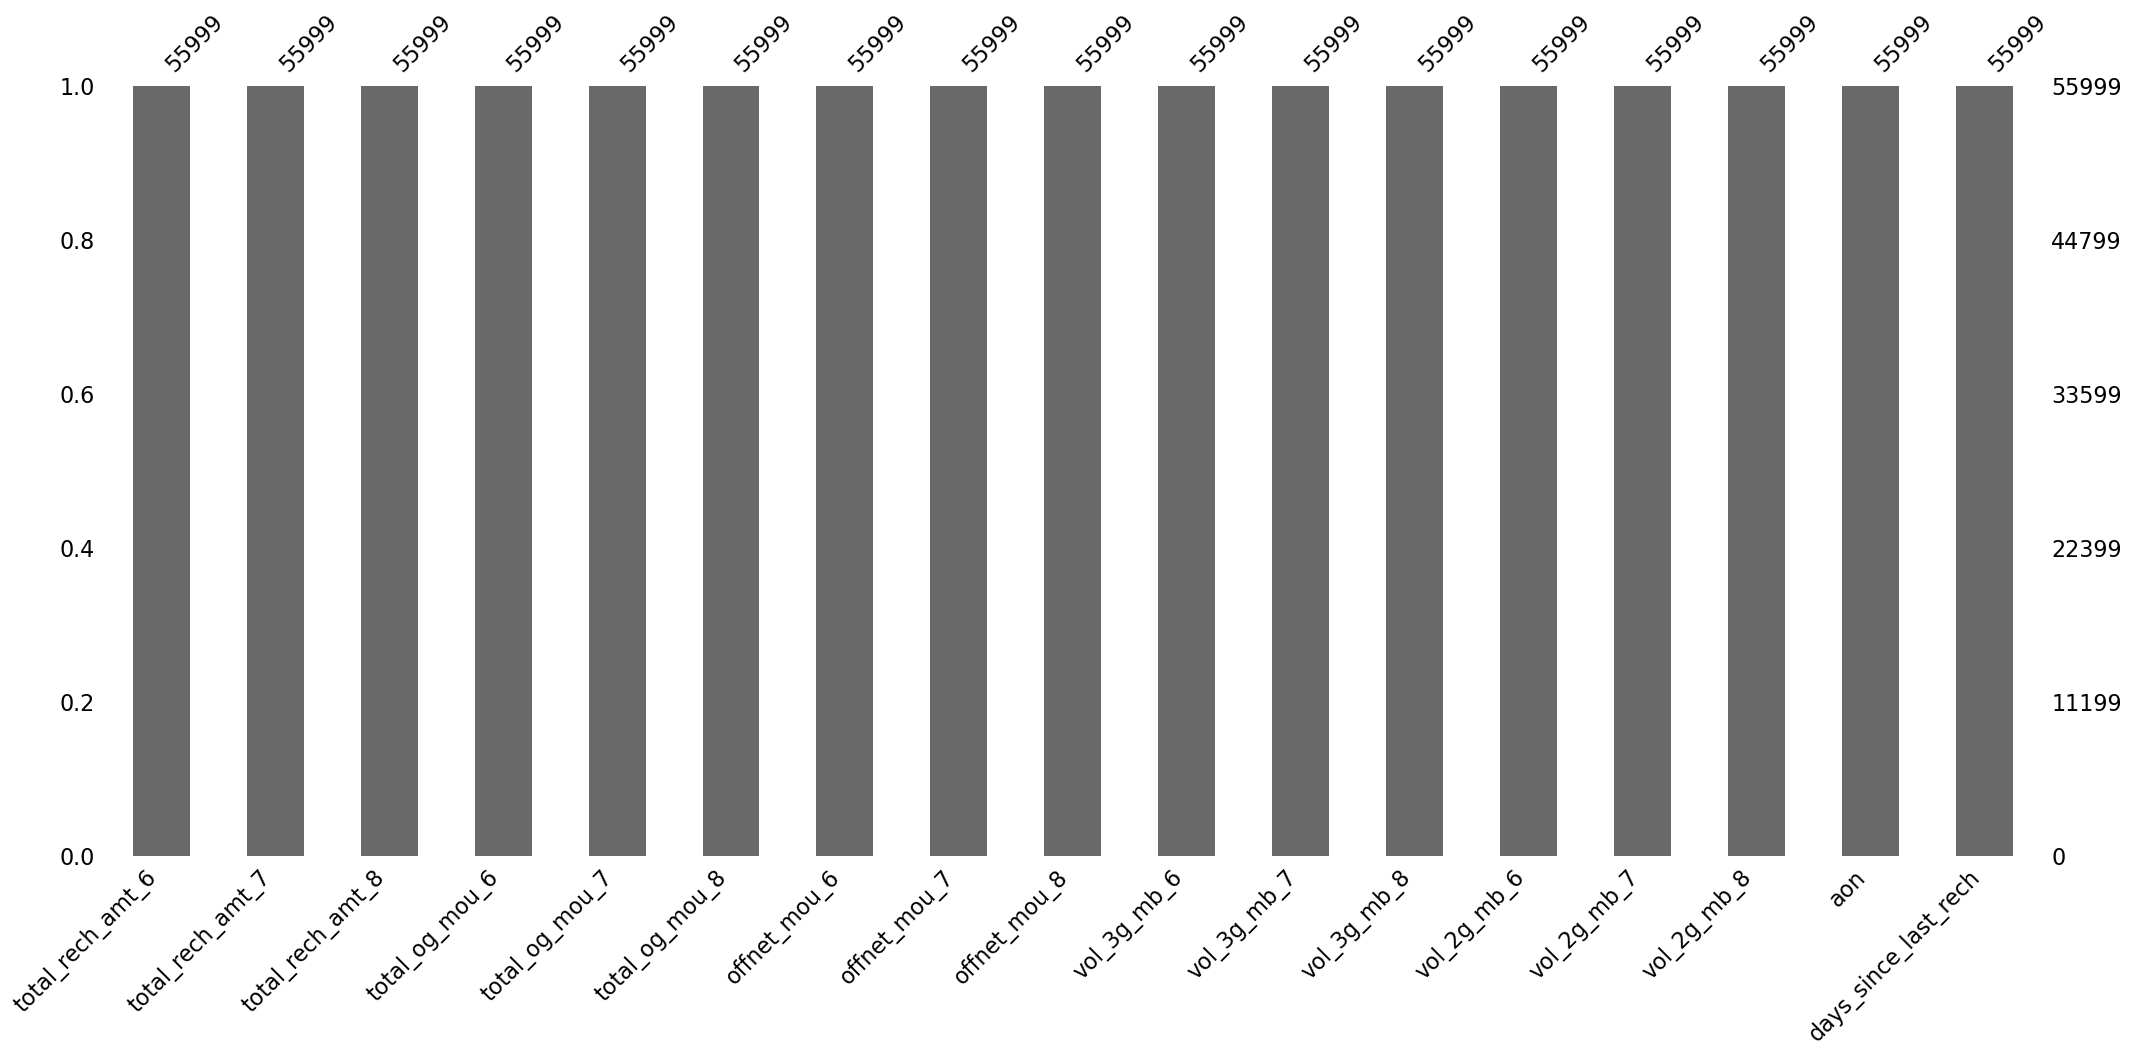

In [38]:
msno.bar(X_train_filtered)

In [39]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,days_since_last_rech
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,326.995428,321.842122,323.994125,304.828256,310.051796,304.050804,190.162709,188.775586,185.226474,123.292960,128.868801,134.725308,52.189514,52.028395,50.537829,1220.245844,7.105680
std,406.716566,412.005171,435.687862,464.052865,478.362341,477.061411,311.900545,315.312425,314.495677,568.713548,551.007166,561.869345,215.635650,215.321903,217.399358,952.529266,10.786527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,110.000000,100.000000,91.000000,44.690000,42.960000,38.800000,28.780000,26.840000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,1.000000
50%,228.000000,220.000000,225.000000,144.690000,141.140000,138.530000,89.690000,85.430000,83.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,4.000000
75%,436.000000,430.000000,434.000000,371.885000,378.425000,369.850000,222.675000,217.685000,215.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1811.500000,7.000000
max,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,45735.400000,28144.120000,30036.060000,10285.900000,7873.550000,11117.610000,4337.000000,122.000000


In [40]:
X_test_filtered = X_test[new_vars]

In [41]:
#Add the new field on the test data
derive_days_since_recharge(X_test_filtered)

In [42]:
X_test_filtered.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,days_since_last_rech
id,,,,,,,,,,,,,,,,,
1873,220,653,349,195.59,901.18,605.29,186.39,886.01,597.43,0.00,0.00,0.00,0.00,0.00,0.00,303,13
6221,1429,1861,881,80.24,0.00,0.00,212.54,39.88,81.73,3977.57,5258.33,6024.95,66.77,116.17,129.64,336,3
22393,260,0,296,652.16,0.00,529.69,149.11,2.86,128.54,0.00,0.00,0.00,0.00,0.00,0.00,1147,3
27102,140,140,493,64.79,128.74,324.74,44.71,92.59,237.44,0.00,0.00,0.00,0.00,0.00,0.00,3182,2
48950,548,198,198,189.61,82.36,150.78,72.78,47.29,65.78,0.00,0.00,0.00,2465.25,2025.26,1651.62,270,25


# 4. EDA and Data Processing

## 4.1. Perform EDA

<Figure size 640x480 with 0 Axes>

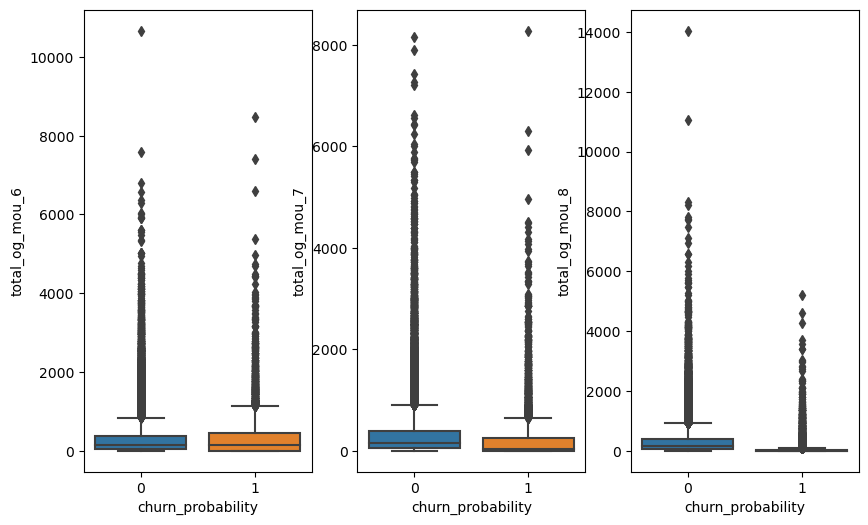

In [43]:
plt.figure()
fig1, ax = plt.subplots(1,3)
fig1.set_size_inches(10,6)
sns.boxplot(ax=ax[0],x=y_train,y='total_og_mou_6',data=X_train_filtered)
sns.boxplot(ax=ax[1],x=y_train,y='total_og_mou_7',data=X_train_filtered)
sns.boxplot(ax=ax[2],x=y_train,y='total_og_mou_8',data=X_train_filtered)

plt.show()

<Figure size 640x480 with 0 Axes>

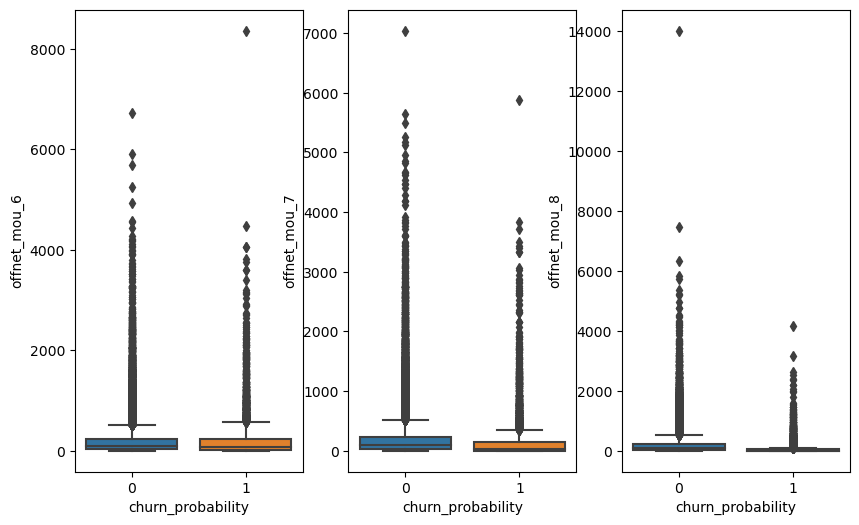

In [44]:
plt.figure()
fig1, ax = plt.subplots(1,3)
fig1.set_size_inches(10,6)
sns.boxplot(ax=ax[0],x=y_train,y='offnet_mou_6',data=X_train_filtered)
sns.boxplot(ax=ax[1],x=y_train,y='offnet_mou_7',data=X_train_filtered)
sns.boxplot(ax=ax[2],x=y_train,y='offnet_mou_8',data=X_train_filtered)
plt.show()

There is a decline in the mou from month 6 to 8 for the customers in class 1 (churn)

<Axes: xlabel='aon', ylabel='days_since_last_rech'>

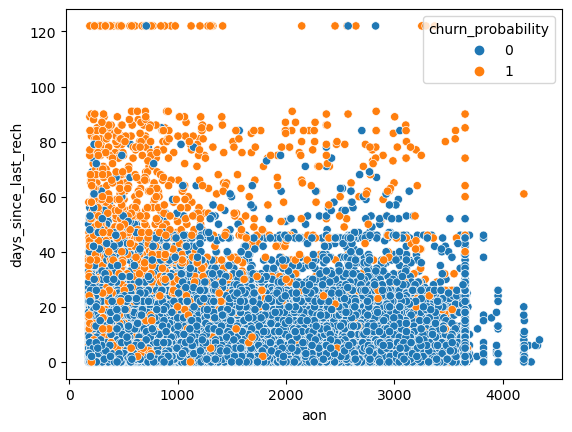

In [45]:
# Scatter plot of days since last recharge and age on network hued by churn_probability

sns.scatterplot(x='aon',y='days_since_last_rech', hue=y_train, data=X_train_filtered)

We see here that there is a higher concentration of class 1 data for low aon and high values of days_since_last_rech

In [46]:
avg_og_mou_class1_6 = (X_train_filtered[y_train == 1].total_og_mou_6.sum())/len(X_train_filtered[y_train == 1])
avg_og_mou_class1_7 = (X_train_filtered[y_train == 1].total_og_mou_7.sum())/len(X_train_filtered[y_train == 1])
avg_og_mou_class1_8 = (X_train_filtered[y_train == 1].total_og_mou_8.sum())/len(X_train_filtered[y_train == 1])

avg_og_mou_class0_6 = (X_train_filtered[y_train == 0].total_og_mou_6.sum())/len(X_train_filtered[y_train == 0])
avg_og_mou_class0_7 = (X_train_filtered[y_train == 0].total_og_mou_7.sum())/len(X_train_filtered[y_train == 0])
avg_og_mou_class0_8 = (X_train_filtered[y_train == 0].total_og_mou_8.sum())/len(X_train_filtered[y_train == 0])

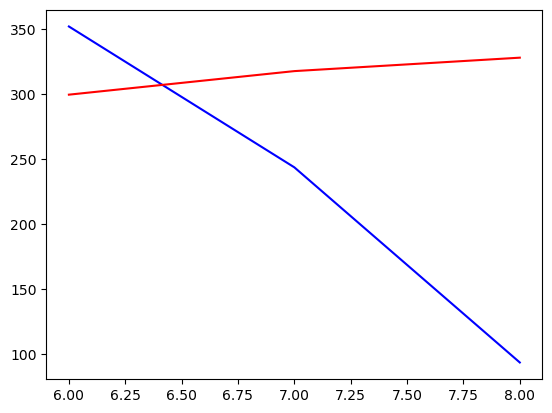

In [47]:
plt.plot([6,7,8],[avg_og_mou_class1_6,avg_og_mou_class1_7,avg_og_mou_class1_8], color='b')
plt.plot([6,7,8],[avg_og_mou_class0_6,avg_og_mou_class0_7,avg_og_mou_class0_8], color='r')
plt.show()

As we see from above plot there is a significant decline in the average outgoing minutes of usage from Month 6 to 8

## 4.2. Data Preprocessing

<Axes: >

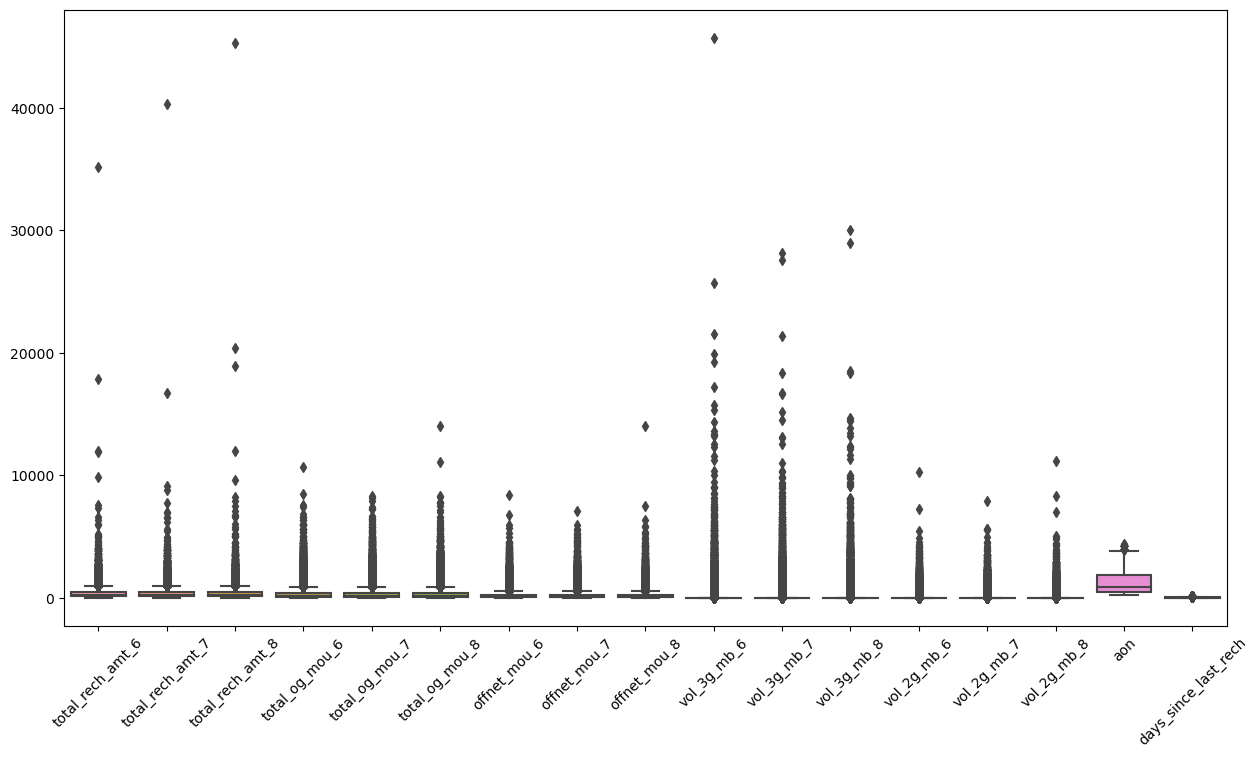

In [48]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

### 4.2.1. Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [49]:
def k_sigma_capping(df_train, df_test,col_list, k=4):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_train_capped = df_train.copy()
    df_test_capped = df_test.copy()

    for col in col_list:
        mean = df_train_capped[col].mean()
        std = df_train_capped[col].std()
        
        # Define the upper and lower bound for capping
        upper_bound = mean + k * std
        lower_bound = mean - k * std
        
        # Cap the outliers in train
        df_train_capped[col] = np.where(df_train_capped[col] > upper_bound, upper_bound, df_train_capped[col])
        df_train_capped[col] = np.where(df_train_capped[col] < lower_bound, lower_bound, df_train_capped[col])
        
        # Use same bounds to cap the outliers in test
        df_test_capped[col] = np.where(df_test_capped[col] > upper_bound, upper_bound, df_test_capped[col])
        df_test_capped[col] = np.where(df_test_capped[col] < lower_bound, lower_bound, df_test_capped[col])
        
    return df_train_capped, df_test_capped

In [50]:
col_list = X_train_filtered.columns.to_list()

In [51]:
X_train_capped, X_test_capped = k_sigma_capping(X_train_filtered, X_test_filtered, col_list )

In [52]:
X_train_capped.shape, X_test_capped.shape

((55999, 17), (14000, 17))

<Axes: >

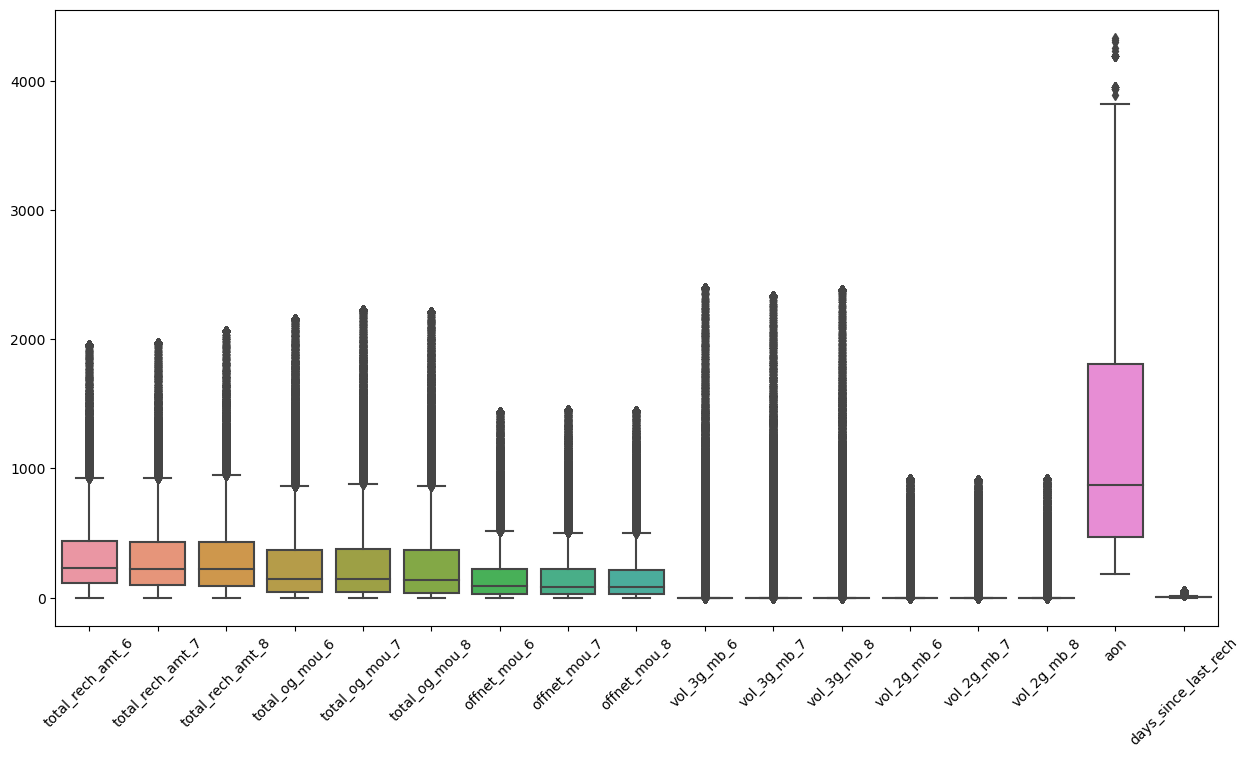

In [53]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_capped)

### 4.2.2. Handle data imbalance

Currently as we see the minority class is 10% of the majority class, lets apply SMOTE to oversample the minority class to have 20% samples as compared to majority class

In [54]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.2, random_state=42)

In [55]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_capped, y_train)

<Axes: xlabel='churn_probability', ylabel='Count'>

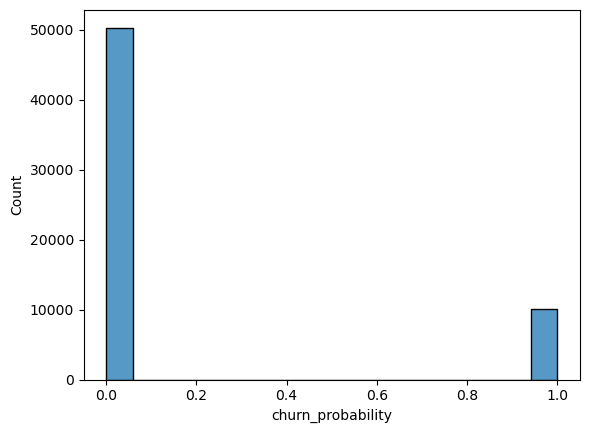

In [56]:
#Distribution for the churn probability
sns.histplot(y_train_smote)

In [57]:
X_train_smote.shape, y_train_smote.shape

((60351, 17), (60351,))

### 4.2.3. Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [58]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_smote)

In [59]:
X_new_vars = X_train_smote.columns.to_list()

<Axes: >

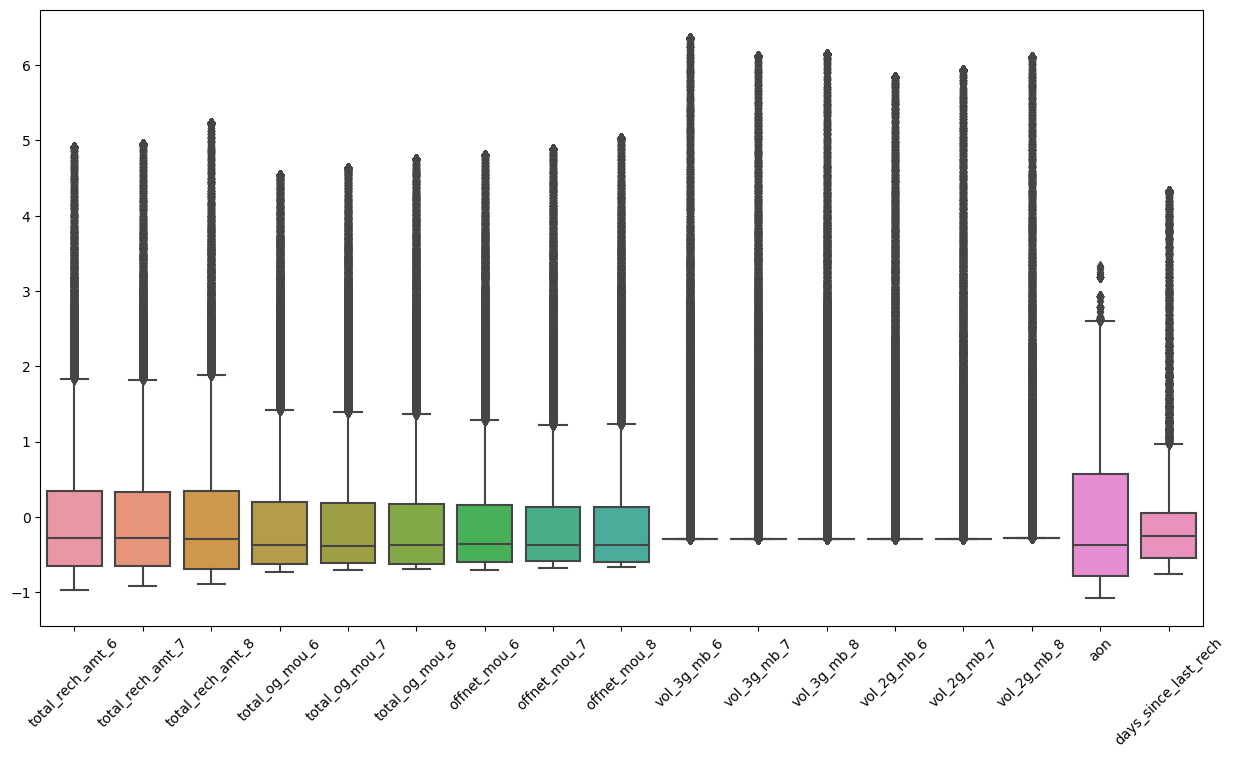

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_scaled, columns=X_new_vars))

### 4.2.4. Apply data transformations

In [61]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_new_vars)

In [62]:
#Lets first calculate the skewness of the data
high_skew_cols = []
for col in X_new_vars:
    data_skewness = skew(X_train_scaled[col])
    print(col,' : ', data_skewness)
    if data_skewness > 1:
        high_skew_cols.append(col)

total_rech_amt_6  :  2.0388169182875613
total_rech_amt_7  :  2.105633321150179
total_rech_amt_8  :  2.146138366835784
total_og_mou_6  :  2.4177825895927785
total_og_mou_7  :  2.470175219973302
total_og_mou_8  :  2.5323335713191915
offnet_mou_6  :  2.6999615706620004
offnet_mou_7  :  2.737451513121775
offnet_mou_8  :  2.7773061479474377
vol_3g_mb_6  :  4.340689305541834
vol_3g_mb_7  :  4.188701400798587
vol_3g_mb_8  :  4.172630952899353
vol_2g_mb_6  :  4.294226923755435
vol_2g_mb_7  :  4.376656467505375
vol_2g_mb_8  :  4.564453163590762
aon  :  0.9952089977316795
days_since_last_rech  :  2.473768886126966


Most of the data here has a positive skew. This is indicated by the values of the skewness and also by the fact that the upper tail of the box plot has more length 

Lets first treat the features which have a high positive skew - greater than 1. 
Some options of transformations for poitive skew are as below:
- Log Transformation: Best for highly skewed data but cannot handle zeros or negative values without adjustment.
- Square Root Transformation: Best for moderately skewed data.
- Cube Root Transformation: Best for mildly skewed data.
- Box-Cox Transformation: Flexible and optimal for highly skewed positive data.
- Yeo-Johnson Transformation: Flexible and can handle zero and negative values.    

In [63]:
#Lets first see the min and max values for these columns
for col in high_skew_cols:
    print("For column {} min value = {} and max value = {}".format(col,X_train_scaled[col].min(),X_train_scaled[col].max()))

For column total_rech_amt_6 min value = -0.9664728625121738 and max value = 4.905723317750097
For column total_rech_amt_7 min value = -0.9257404232185821 and max value = 4.956311183005856
For column total_rech_amt_8 min value = -0.8987106598418222 and max value = 5.224447603674844
For column total_og_mou_6 min value = -0.7269847256775339 and max value = 4.53544790179967
For column total_og_mou_7 min value = -0.7082213823034658 and max value = 4.626625617999183
For column total_og_mou_8 min value = -0.6875570480876787 and max value = 4.754464220644877
For column offnet_mou_6 min value = -0.7027044094915229 and max value = 4.810387318569029
For column offnet_mou_7 min value = -0.6812587801081991 and max value = 4.880567126165848
For column offnet_mou_8 min value = -0.6664424333769312 and max value = 5.024994424934852
For column vol_3g_mb_6 min value = -0.291952201074415 and max value = 6.364698555828615
For column vol_3g_mb_7 min value = -0.2982015211063027 and max value = 6.123639125510

As all the features have negative and positive values, therefore we will use the Yeo-Johnson Transformation on these features

In [64]:
# Apply Yeo-Johnson Transformation
X_train_transformed = X_train_scaled.copy()
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed[high_skew_cols] = pt.fit_transform(X_train_scaled[high_skew_cols])

<Axes: >

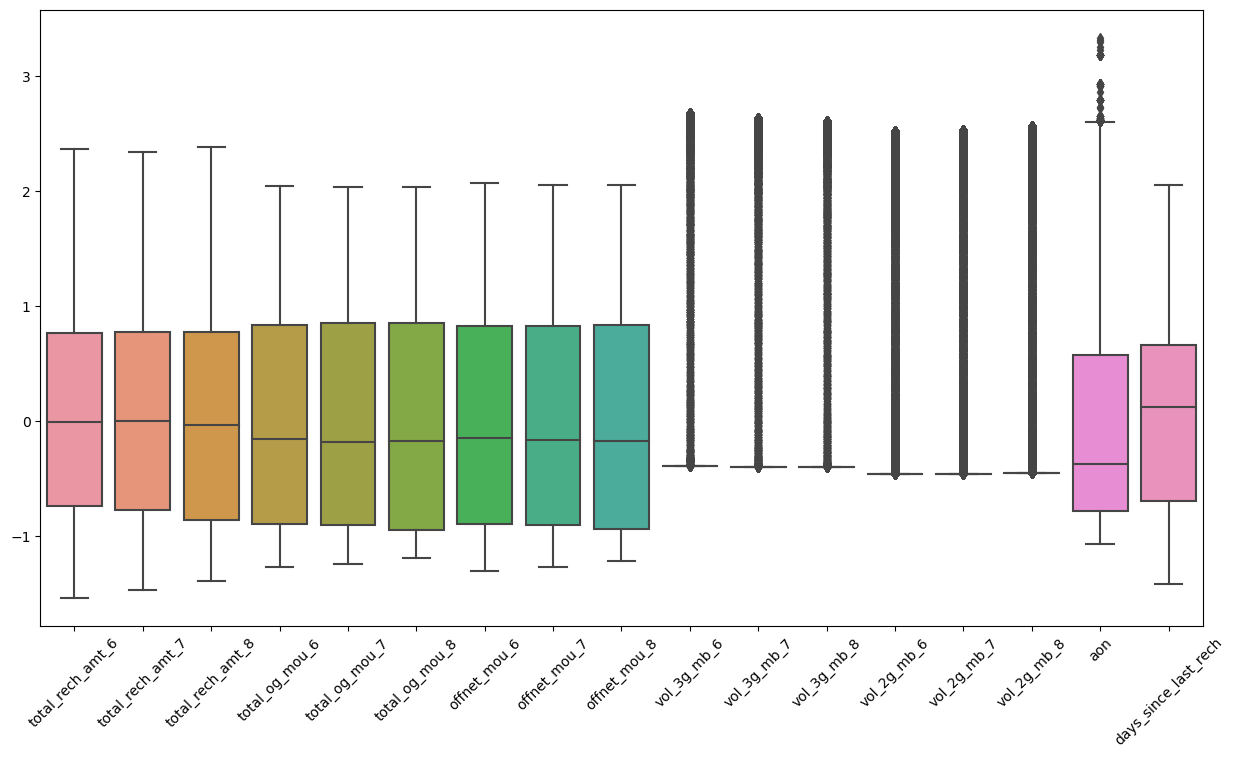

In [65]:
#Lets plot the transformed data
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_transformed, columns=X_new_vars))

In [66]:
# Lets check the skewness 
for col in X_new_vars:
    data_skewness = skew(X_train_transformed[col])
    print(col,' : ', data_skewness)
    if data_skewness > 1:
        high_skew_cols.append(col)

total_rech_amt_6  :  0.15588643706255761
total_rech_amt_7  :  0.17811589161788002
total_rech_amt_8  :  0.18551245479046397
total_og_mou_6  :  0.3636143873561994
total_og_mou_7  :  0.38802768594274645
total_og_mou_8  :  0.4011650856720343
offnet_mou_6  :  0.36433496027717455
offnet_mou_7  :  0.3933840181889366
offnet_mou_8  :  0.4034974427262959
vol_3g_mb_6  :  2.1988888070927737
vol_3g_mb_7  :  2.14787120024876
vol_3g_mb_8  :  2.123719317439764
vol_2g_mb_6  :  1.8706936447530107
vol_2g_mb_7  :  1.8841975350435196
vol_2g_mb_8  :  1.9208399481915348
aon  :  0.9952089977316795
days_since_last_rech  :  0.27259725945790964


As we see, the results are better than before

The feature aon has a moderate positive skew. Lets check the min and max values

In [67]:
print("For column {} min value = {} and max value = {}".format('aon',X_train_transformed['aon'].min(),X_train_transformed['aon'].max()))

For column aon min value = -1.07283293172089 and max value = 3.336830133823282


As the column has negative values as well, lets apply Yeo Johnson transformation

In [68]:
X_train_transformed[['aon']] = pt.fit_transform(X_train_smote[['aon']])

In [69]:
# Lets check the skewness 
for col in X_new_vars:
    data_skewness = skew(X_train_transformed[col])
    print(col,' : ', data_skewness)
    if data_skewness > 1:
        high_skew_cols.append(col)

total_rech_amt_6  :  0.15588643706255761
total_rech_amt_7  :  0.17811589161788002
total_rech_amt_8  :  0.18551245479046397
total_og_mou_6  :  0.3636143873561994
total_og_mou_7  :  0.38802768594274645
total_og_mou_8  :  0.4011650856720343
offnet_mou_6  :  0.36433496027717455
offnet_mou_7  :  0.3933840181889366
offnet_mou_8  :  0.4034974427262959
vol_3g_mb_6  :  2.1988888070927737
vol_3g_mb_7  :  2.14787120024876
vol_3g_mb_8  :  2.123719317439764
vol_2g_mb_6  :  1.8706936447530107
vol_2g_mb_7  :  1.8841975350435196
vol_2g_mb_8  :  1.9208399481915348
aon  :  0.005454006270133924
days_since_last_rech  :  0.27259725945790964


<Axes: >

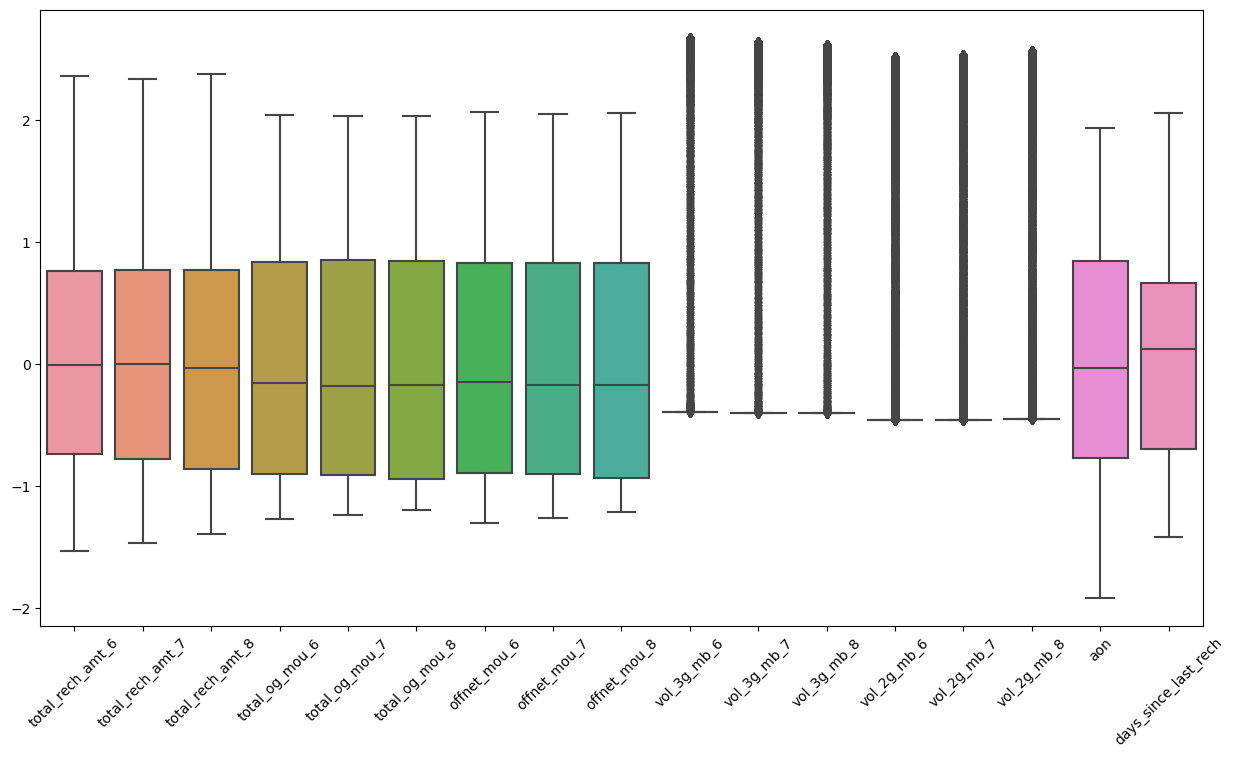

In [70]:
#Lets plot the transformed data
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_transformed, columns=X_new_vars))

<Axes: >

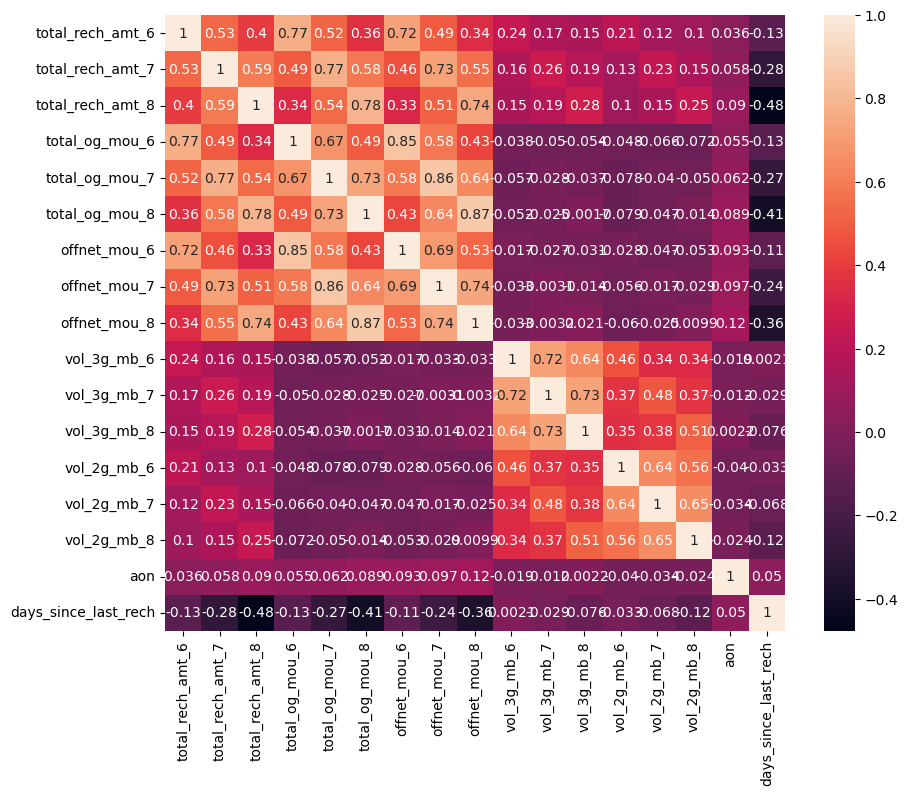

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_train_transformed, columns=X_new_vars).corr(), annot=True)

# 5. Feature engineering and selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [72]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_transformed, y_train_smote)

RandomForestClassifier(n_jobs=-1)

In [73]:
feature_importances = pd.DataFrame({'col':X_new_vars, 'importance':rf.feature_importances_})

<BarContainer object of 17 artists>

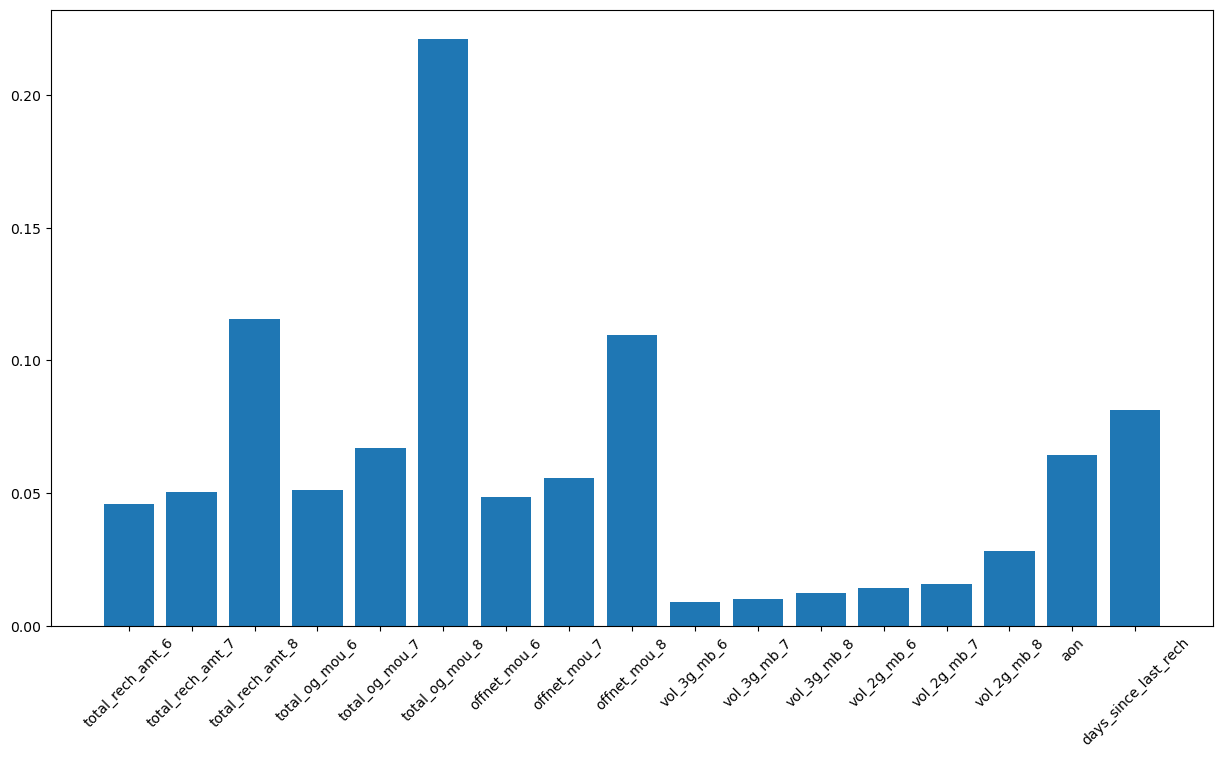

In [74]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

At this step, you can create a bunch of features based on business understanding, such as 
1. "average % gain of 3g volume from month 6 to 8" - (growth or decline of 3g usage month over month?)
2. "ratio of total outgoing amount and age of user on network" - (average daily usage of a user?)
3. "standard deviation of the total amount paid by user for all services" - (too much variability in charges?)
4. etc..

Another way of finding good features would be to project them into a lower dimensional space using PCA. PCA creates components which are a linear combination of the features. This then allows you to select components which explain the highest amount of variance.

Lets try to project the data onto 2D space and plot. **Note:** you can try TSNE, which is another dimensionality reduction approach as well. Check https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for moree details.

<Axes: >

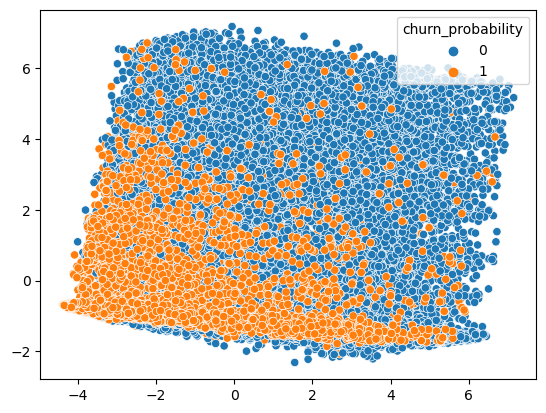

In [75]:
pca = PCA()
pca_components = pca.fit_transform(X_train_transformed)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train_smote)

<Axes: >

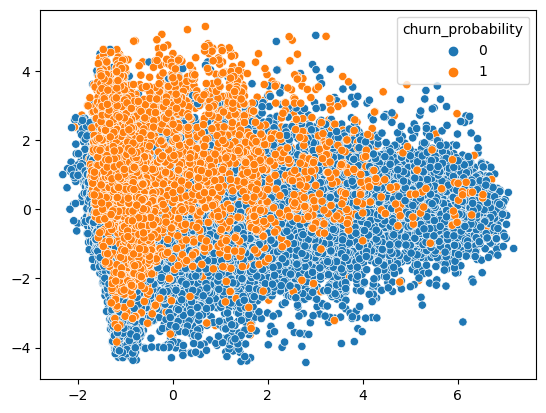

In [76]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train_smote)

Let's also check which of the components have high feature importances towards the end goal of churn prediction.

<BarContainer object of 17 artists>

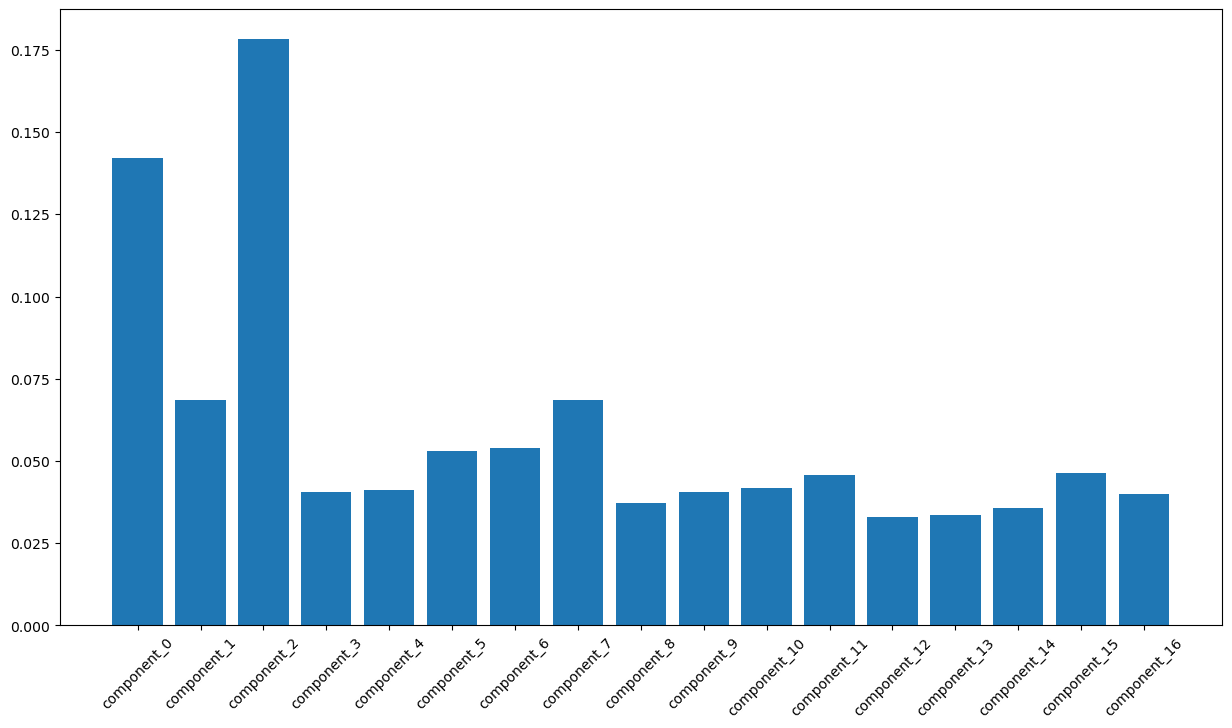

In [77]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train_smote)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(len(X_new_vars))], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

# 6. Model building

Let's build a quick model with logistic regression and the first 10 PCA components.

## 6.1. Base Model with Logistic Regression

In [78]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:10], y_train_smote)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [79]:
lr.score(pca_components[:,:10], y_train_smote)

0.8757767062683303

The model has 87.5% accuracy, but let's build a pipeline to fit and score the model faster.



In [80]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
transform = PowerTransformer(method='yeo-johnson')
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [81]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca),
                         ('model',lr)])

In [82]:
pipe.fit(X_train_capped[X_new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [83]:
train_score = pipe.score(X_train_capped[X_new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.909105519741424


In [90]:
test_score = pipe.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9097142857142857


Let's make a confusion matrix to analyze how each class is being predicted by the model.

In [91]:
confusion_matrix(y_train, pipe.predict(X_train_capped[X_new_vars]))

array([[49577,   716],
       [ 4374,  1332]], dtype=int64)

In [93]:
confusion_matrix(y_test, pipe.predict(X_test_capped[X_new_vars]))

array([[12367,   207],
       [ 1057,   369]], dtype=int64)

In [94]:
precision_score(y_test, pipe.predict(X_test_capped[X_new_vars]))

0.640625

In [95]:
recall_score(y_test, pipe.predict(X_test_capped[X_new_vars]))

0.258765778401122

Lets fit the same pipe on X_train_smote

In [96]:
pipe2 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca),
                         ('model',lr)])

In [97]:
pipe2.fit(X_train_smote[X_new_vars], y_train_smote)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [98]:
train_score = pipe2.score(X_train_smote[X_new_vars], y_train_smote)
print("Training accuracy:", train_score)

Training accuracy: 0.8761743798777154


In [100]:
test_score = pipe2.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9077857142857143


There is a slight reduction in Logistic Regression accuracy with the Smote

## 6.2. Model using Random Forest

### 6.2.1. Base Model of RF

Lets build a pipe3 with a random forest classifier

In [101]:
rf = RandomForestClassifier(n_estimators=150, n_jobs=-1, min_samples_leaf=3, min_samples_split=6)

In [103]:
pipe3 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca),
                         ('model',rf)])

With SMOTE

In [104]:
pipe3.fit(X_train_smote[X_new_vars], y_train_smote)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=3, min_samples_split=6,
                                        n_estimators=150, n_jobs=-1))])

In [105]:
train_score = pipe3.score(X_train_smote[X_new_vars], y_train_smote)
print("Training accuracy:", train_score)

Training accuracy: 0.9719308710709019


In [106]:
test_score = pipe3.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9169285714285714


Without SMOTE

In [108]:
pipe3.fit(X_train_capped[X_new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=3, min_samples_split=6,
                                        n_estimators=150, n_jobs=-1))])

In [109]:
train_score = pipe3.score(X_train_capped[X_new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9697673172735227


In [110]:
test_score = pipe3.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9181428571428571


We get a higher test acuracy in this case

### 6.2.2. Apply RF pipeline in a GridSearchCV

In [111]:
rf2 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [112]:
pca2 = PCA()

In [152]:
pipe4 = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca2),
                         ('rf',rf2)])

In [93]:
param_grid = {
    'pca__n_components': [6, 8, 10],               # Number of principal components to consider
    'rf__n_estimators': [100, 200],           # Number of trees in the forest
    'rf__min_samples_split': [6, 8, 10],          # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [2, 3, 4]             # Minimum number of samples required to be at a leaf node
}


In [95]:
grid_search = GridSearchCV(pipe4, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)

In [96]:
%%time
grid_search.fit(X_train_smote[X_new_vars], y_train_smote)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 2min 39s
Wall time: 1h 11min 23s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('scaling', StandardScaler()),
                                       ('transformation', PowerTransformer()),
                                       ('pca', PCA()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [6, 8, 10],
                         'rf__min_samples_leaf': [2, 3, 4],
                         'rf__min_samples_split': [6, 8, 10],
                         'rf__n_estimators': [100, 200]},
             scoring='accuracy', verbose=3)

In [97]:
# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'pca__n_components': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 6, 'rf__n_estimators': 200}
Best cross-validation score: 0.90


In [99]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_

In [101]:
test_score = best_model.score(X_test_filtered[X_new_vars], y_test)
test_score

0.9175714285714286

In [104]:
y_pred = best_model.predict(X_test_filtered[X_new_vars])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12613
           1       0.60      0.50      0.55      1387

    accuracy                           0.92     14000
   macro avg       0.77      0.73      0.75     14000
weighted avg       0.91      0.92      0.91     14000



Build the RF and PCA based on the best parameters derived above

In [113]:
pca_new = PCA(n_components=10)

In [114]:
rf_new = RandomForestClassifier(n_jobs=-1, random_state=42, min_samples_leaf = 2, min_samples_split=6, n_estimators=200)

In [115]:
pipe_new = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca_new),
                         ('model',rf_new)])

In [117]:
pipe_new.fit(X_train_capped[X_new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [118]:
train_score = pipe_new.score(X_train_capped[X_new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9761602885765818


In [119]:
test_score = pipe_new.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9191428571428572


Replicate the same pipe with SMOTE

In [120]:
pipe_for_smote = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca_new),
                         ('model',rf_new)])

In [121]:
pipe_for_smote.fit(X_train_smote[X_new_vars], y_train_smote)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [122]:
train_score = pipe_for_smote.score(X_train_smote[X_new_vars], y_train_smote)
print("Training accuracy:", train_score)

Training accuracy: 0.9804477142052327


In [123]:
test_score = pipe_for_smote.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9176428571428571


The test accuracy with SMOTE is slightly lower

### 6.2.3. Try with an increased value of sampling strategy in SMOTE 

In [147]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.3, random_state=42)

In [148]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_capped, y_train)

<Axes: xlabel='churn_probability', ylabel='Count'>

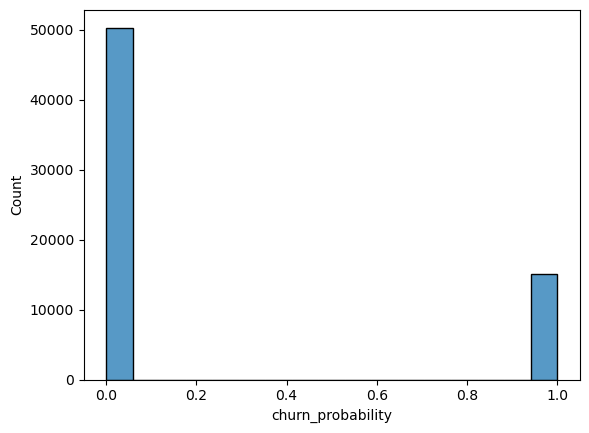

In [149]:
#Distribution for the churn probability
sns.histplot(y_train_smote)

In [150]:
X_train_smote.shape, y_train_smote.shape

((65380, 17), (65380,))

In [151]:
pipe_high_smote = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('transformation',transform),
                         ('pca',pca_new),
                         ('model',rf_new)])

In [152]:
pipe_high_smote.fit(X_train_smote[X_new_vars], y_train_smote)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('transformation', PowerTransformer()),
                ('pca', PCA(n_components=10)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [153]:
train_score = pipe_high_smote.score(X_train_smote[X_new_vars], y_train_smote)
print("Training accuracy:", train_score)

Training accuracy: 0.9829305598042215


In [154]:
test_score = pipe_high_smote.score(X_test_capped[X_new_vars], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9120714285714285


Lets revert back to the same SMOTE value as we see an accuracy reduction

In [157]:
# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.2, random_state=42)

In [158]:
X_train_smote, y_train_smote = smote.fit_resample(X_train_capped, y_train)

<Axes: xlabel='churn_probability', ylabel='Count'>

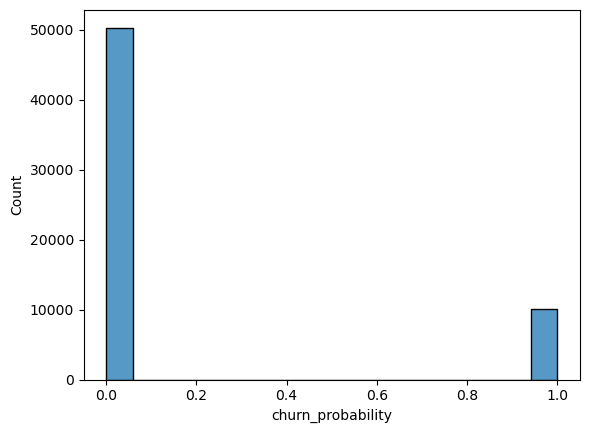

In [159]:
#Distribution for the churn probability
sns.histplot(y_train_smote)

In [160]:
X_train_smote.shape, y_train_smote.shape

((60351, 17), (60351,))

## 6.3. Model using XGBoost

### 6.3.1. Base Model

In [162]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [164]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_capped, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_capped)

In [165]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_capped)
xgb_predictions_prob

array([[0.58688086, 0.41311914],
       [0.98896194, 0.01103808],
       [0.97940046, 0.02059954],
       ...,
       [0.97248566, 0.02751435],
       [0.13620442, 0.8637956 ],
       [0.99582076, 0.00417924]], dtype=float32)

In [168]:
accuracy_score(y_test, xgb_predictions)

0.9332857142857143

Try with X_train_smote

In [169]:
xgb_cf2 = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [170]:
# Fit the model to our train and target
xgb_cf2.fit(X_train_smote, y_train_smote)  # default 
# Get our predictions
xgb_predictions_2 = xgb_cf2.predict(X_test_capped)

In [171]:
xgb_predictions_prob2 = xgb_cf2.predict_proba(X_test_capped)
xgb_predictions_prob2

array([[0.6585628 , 0.34143725],
       [0.9886014 , 0.01139859],
       [0.995661  , 0.004339  ],
       ...,
       [0.9439882 , 0.05601181],
       [0.25496113, 0.74503887],
       [0.99628085, 0.00371917]], dtype=float32)

In [172]:
accuracy_score(y_test, xgb_predictions_2)

0.9305714285714286

### 6.3.2. Hyperparameter Tuning for XGBoost

In [175]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200], # no of trees 
        'learning_rate' : [0.02, 0.05, 0.15],  # eta
        'min_child_weight': [2, 5, 7],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.75, 1],
        'max_depth': [5, 10, 12],
        'scale_pos_weight': [1,3,7]
        }

folds = 4
param_comb = 300
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=4, verbose=3, random_state=42)


In [176]:
random_search.fit(X_train_capped, y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.5, 1],
                                        'learning_rate': [0.02, 0.05, 0.15],
                                        'max_depth': [5, 10, 12],
                                        'min_child_weight': [2, 5, 7],
                                        'n_estimators': [100, 200],
                                        'scale_pos_weight': [1, 3, 7],
                                        'subsample': [0.75, 1]},
                   random_state=42, scoring='accuracy', verbose=3)

In [177]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

 Best accuracy for 4-fold search with 300 parameter combinations:
0.9342131198146806

 Best hyperparameters:
{'subsample': 1, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.02, '

In [178]:
xgb_predictions_hpt = random_search.predict(X_test_capped)
accuracy_score(y_test, xgb_predictions_hpt)

0.9345

In [184]:
xgb_predictions_hpt

array([0, 0, 0, ..., 0, 1, 0])

### Lets fit the tuned XGBoost Model on X_train_smote

In [186]:
best_xgb = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic', subsample = 1, scale_pos_weight = 1, 
                             n_estimators = 200, min_child_weight = 7, max_depth = 5, learning_rate = 0.02, gamma = 0.1)
best_xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [187]:
xgb_predictions_hpt_2 = best_xgb.predict(X_test_capped)
accuracy_score(y_test, xgb_predictions_hpt_2)

0.9320714285714286

# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [124]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [125]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

In [126]:
submission_data = unseen.set_index('id')[new_vars]
submission_data.shape

(30000, 19)

In [127]:
derive_days_since_recharge(submission_data)

In [128]:
submission_data.shape

(30000, 17)

In [130]:
len(X_new_vars)

17

In [131]:
X_train_capped.shape, X_train_smote.shape

((55999, 17), (60351, 17))

Next, lets create a new column in the unseen dataset called churn_probability and use the model pipeline to predict the probabilities for this data

## 7.1. Predict using pipe2 for LR with SMOTE

In [132]:
unseen['churn_probability'] = pipe2.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [133]:
output.to_csv('submission_pca_lr_smote_7jul.csv',index=False)

### Accuracy for this submission is 90.813%

## 7.2. Predict using pipe3 for RF without SMOTE

In [134]:
unseen['churn_probability'] = pipe3.predict(submission_data)
output2 = unseen[['id','churn_probability']]
output2.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [135]:
output2.to_csv('submission_pca_rf_7jul.csv',index=False)

### Accuracy for this submission is 91.946%

## 7.3. Predict using pipe_new for the best param RF without SMOTE

In [136]:
unseen['churn_probability'] = pipe_new.predict(submission_data)
output3 = unseen[['id','churn_probability']]
output3.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [137]:
output3.to_csv('submission_pca_rf_best_7jul.csv',index=False)

### Accuracy for this submission is 92.110%

## 7.4. Predict using the pipeline pipe_for_smote that uses RF best parameters and smote on train dataset

In [138]:
unseen['churn_probability'] = pipe_for_smote.predict(submission_data)
output4 = unseen[['id','churn_probability']]
output4.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [139]:
output4.to_csv('submission_pca_rf_best_smote_7jul.csv',index=False)

### Accuracy for this submission on kaggle is 92.110%

## 7.5. Prediction with capping of outliers on unseen data based on the bounds of the train data

In [140]:
len(X_train_filtered.columns)

17

In [141]:
col_list = X_train_filtered.columns.to_list()

In [142]:
X_train_capped, submission_data_cap = k_sigma_capping(X_train_filtered, submission_data, col_list )

Use the pipe_new to predict

In [143]:
unseen['churn_probability'] = pipe_new.predict(submission_data_cap)
output5 = unseen[['id','churn_probability']]
output5.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [144]:
output5.to_csv('submission_pca_rf_cap_7jul.csv',index=False)

### Accuracy for this submission is 92.103%

## 7.6. Capped submission data with smote on train dataset

In [145]:
unseen['churn_probability'] = pipe_for_smote.predict(submission_data_cap)
output6 = unseen[['id','churn_probability']]
output6.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [146]:
output6.to_csv('submission_pca_rf_smote_cap_7jul.csv',index=False)

### Accuracy for this submission is 92.103%

### Try with higher SMOTE % - using pipe_high_smote

In [155]:
unseen['churn_probability'] = pipe_high_smote.predict(submission_data_cap)
output7 = unseen[['id','churn_probability']]
output7.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [156]:
output7.to_csv('submission_pca_rf_smote_cap_7jul_2.csv',index=False)

### Accuracy for this submission is 91.566% - there is a reduction in accuracy with a higher SMOTE value

## 7.7. Predict using the XGBoost tuned model on capped submission data

In [180]:
#xgb_predictions_hpt = random_search.predict(X_test_capped)
unseen['churn_probability'] = random_search.predict(submission_data_cap) 
output8 = unseen[['id','churn_probability']]
output8.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [181]:
output8.to_csv('submission_xgb_cap_7jul.csv',index=False)

## Accuracy for this submission is 93.570%

## 7.8. Predict using the XGBoost tuned model on uncapped submission data

In [182]:
unseen['churn_probability'] = random_search.predict(submission_data) 
output9 = unseen[['id','churn_probability']]
output9.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [183]:
output9.to_csv('submission_xgb_ncap_7jul.csv',index=False)

## 7.9. Predict using best_xgb which has been fit on X_train_smote

In [188]:
unseen['churn_probability'] = best_xgb.predict(submission_data) 
output10 = unseen[['id','churn_probability']]
output10.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [189]:
output10.to_csv('submission_xgb_smote_ncap_7jul.csv',index=False)

### Accuracy for this submission is 93.330%

## Best Accuracy obtained is 93.570% for the XGBoost tuned model without SMOTE as XGBoost has a hyperparameter for handling class imbalance